# Simple Linear Regression

[*********************100%***********************]  1 of 1 completed


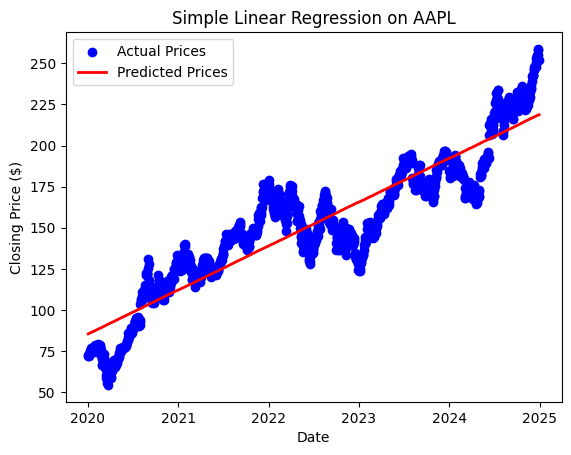

In [9]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Fetch historical stock data for Apple (AAPL)
data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
data = data.reset_index()

# Prepare the data
X = np.arange(len(data)).reshape(-1, 1)
Y = data['Close'].values.reshape(-1, 1)

# Linear Regression Model
model = LinearRegression()
model.fit(X, Y)

# Predictions
predictions = model.predict(X)

# Plotting the results
plt.scatter(data['Date'], Y, color='blue', label='Actual Prices')
plt.plot(data['Date'], predictions, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.title('Simple Linear Regression on AAPL')
plt.legend()
plt.show()

# Advanced Regression Models

In [13]:
import pandas as pd
from pandas_datareader import data as pdr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import datetime

# Set the date range
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime.today()

# Download data from FRED
interest_rate = pdr.DataReader('FEDFUNDS', 'fred', start_date, end_date)  # Federal Funds Rate
inflation_rate = pdr.DataReader('CPALTT01USM657N', 'fred', start_date, end_date)  # Consumer Price Index Inflation
gdp_growth = pdr.DataReader('GDPC1', 'fred', start_date, end_date)  # Real GDP (Quarterly)
sp500 = pdr.DataReader('SP500', 'fred', start_date, end_date)  # S&P 500 Index (Monthly or Daily)

# Merge datasets (inner join on common dates)
econ_data = interest_rate.join([inflation_rate, gdp_growth, sp500]).dropna()
econ_data.columns = ['Interest_Rate', 'Inflation_Rate', 'GDP_Growth', 'S&P500_Index']

# Features and Target
X = econ_data[['Interest_Rate', 'Inflation_Rate', 'GDP_Growth']]
y = econ_data['S&P500_Index']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
multi_reg_model = LinearRegression()
multi_reg_model.fit(X_train, y_train)

# Prediction and Evaluation
y_pred = multi_reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 37210.81609710341


# Polynomial Regression

Training MAE: 9.600562271096074
Training MSE: 143.86918259884342
Testing MAE: 26.18208937474883
Testing MSE: 832.2626682213156


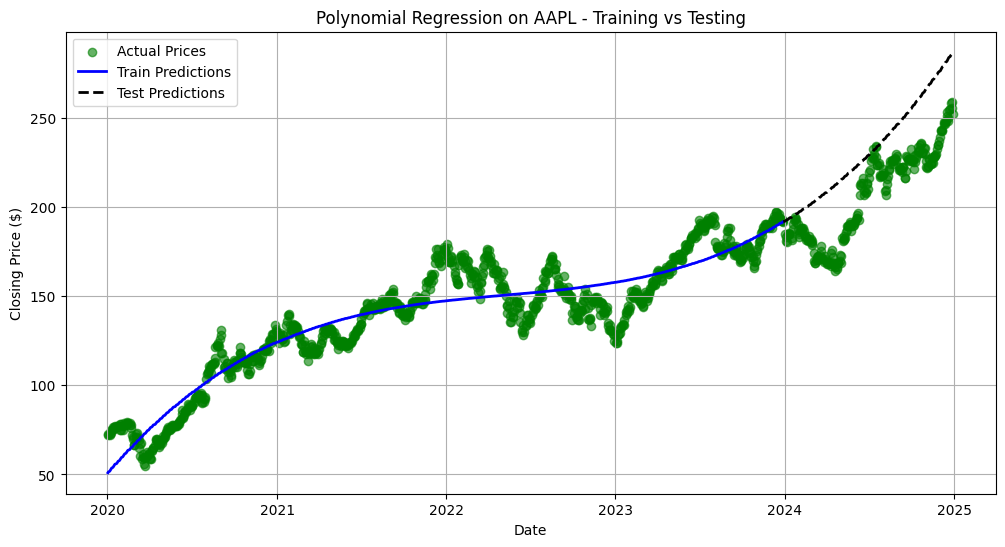

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Using previously fetched stock data (AAPL)
X_poly = np.arange(len(data)).reshape(-1, 1)
Y_poly = data['Close'].values.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test = X_poly[:int(len(X_poly)*0.8)], X_poly[int(len(X_poly)*0.8):]
Y_train, Y_test = Y_poly[:int(len(Y_poly)*0.8)], Y_poly[int(len(Y_poly)*0.8):]

# Polynomial Regression Model (degree 3)
poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_model.fit(X_train, Y_train)
predictions_poly_train = poly_model.predict(X_train)
predictions_poly_test = poly_model.predict(X_test)

# Evaluate Model Performance
mae_train = mean_absolute_error(Y_train, predictions_poly_train)
mse_train = mean_squared_error(Y_train, predictions_poly_train)
mae_test = mean_absolute_error(Y_test, predictions_poly_test)
mse_test = mean_squared_error(Y_test, predictions_poly_test)

print("Training MAE:", mae_train)
print("Training MSE:", mse_train)
print("Testing MAE:", mae_test)
print("Testing MSE:", mse_test)

# Visualization
plt.figure(figsize=(12,6))
plt.scatter(data['Date'], Y_poly, color='green', alpha=0.6, label='Actual Prices')
plt.plot(data['Date'][:len(X_train)], predictions_poly_train, color='blue', linewidth=2, label='Train Predictions')
plt.plot(data['Date'][len(X_train):], predictions_poly_test, color='black', linewidth=2, linestyle='--', label='Test Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.title('Polynomial Regression on AAPL - Training vs Testing')
plt.legend()
plt.grid(True)
plt.show()